# Данные

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture
from scipy.stats import norm, multivariate_normal, gaussian_kde, dirichlet, wishart, t
from scipy.integrate import quad, nquad
from scipy.special import gammaln, psi, digamma, gamma
from scipy.linalg import det, inv
import pints
from scipy.special import loggamma
import time
import pints.plot
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from scipy.integrate import quad, dblquad

In [19]:
# data 
# = pd.read_excel('euro_dollar_without_crisis.xlsx')
data = pd.read_excel('euro_dollar.xlsx')
data = data.sort_values(by = ['curs_euro'])
data.head()

data = data[data['curs_euro'] > -0.14]

list_of_euro = list(data['curs_euro'])
list_of_dollar = list(data['curs_dollar'])
n_samples = data['curs_euro'].size
n_samples

np_data_dollar = np.array(data['curs_dollar']).reshape(-1, 1)
np_data_euro = np.array(data['curs_euro']).reshape(-1, 1)
np_data_euro

array([[-0.08408749],
       [-0.07404701],
       [-0.0712909 ],
       ...,
       [ 0.10664213],
       [ 0.10718334],
       [ 0.10994489]])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    np_data_euro, 
    np_data_dollar, 
    test_size=0.2,  # Доля тестовой выборки (можно указать train_size)
    random_state=42,  # Для воспроизводимости
)

XY_train = np.concatenate([X_train, y_train], axis = 1)
XY_test = np.concatenate([X_test, y_test], axis = 1)

n_samples_train = X_train.shape[0]
n_samples_test = X_test.shape[0]

# Строим полином

## На обучающей выборке

In [21]:
X_train = X_train.flatten()
X_test = X_test.flatten()
y_train = y_train.flatten()
y_test = y_test.flatten()

In [60]:
# Интерполяционный полином максимальной степени (n-1 для n точек)
degree = len(X_train) - 1
degree = 100
coefficients = np.polyfit(X_train, y_train, degree)

# Создание полиномиальной функции
poly = np.poly1d(coefficients)
res = poly(X_train)

c:\Users\Dima\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
X_reshaped = X_train.reshape(1, -1)[0]
sorted_indices = np.argsort(X_reshaped)  # Получаем индексы для сортировки
X_sorted = X_reshaped[sorted_indices]
res_sorted = res[sorted_indices]

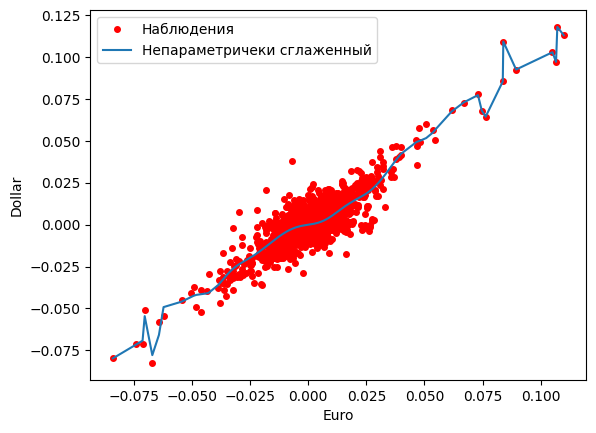

In [62]:
plt.xlabel('Euro')
plt.ylabel('Dollar')
plt.plot(X_train, y_train, 'ro', markersize=4)
plt.plot(X_sorted, res_sorted)
plt.legend(['Наблюдения', 'Непараметричеки сглаженный'])
plt.show()